# 1. Import and Install Dependencies


In [1]:
import cv2
import numpy as np
import os
import shutil
from matplotlib import pyplot as plt
import time
import mediapipe as mp

# 2. Keypoints using MP Holistic


In [2]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities
mp_face_mesh = mp.solutions.face_mesh

In [3]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [4]:
def draw_landmarks(image, results):
    # Draw face mesh
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.face_landmarks, 
            mp_face_mesh.FACEMESH_CONTOURS,
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
    
    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS
        )
    
    # Draw hands
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS
        )
    
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS
        )

In [5]:
def draw_styled_landmarks(image, results):
    # Draw face connections with error checking
    if results.face_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.face_landmarks, 
            mp_face_mesh.FACEMESH_CONTOURS,
            mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
            mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1)
        )
    
    # Draw pose connections
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.pose_landmarks, 
            mp_holistic.POSE_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2)
        )
    
    # Draw hand connections
    if results.left_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.left_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS,
            mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2)
        )
    if results.right_hand_landmarks:
        mp_drawing.draw_landmarks(
            image, 
            results.right_hand_landmarks, 
            mp_holistic.HAND_CONNECTIONS, 
            mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
            mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2)
        )


In [6]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

In [7]:
draw_landmarks(frame, results)

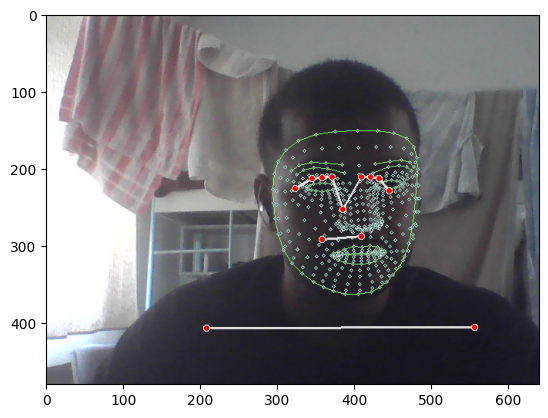

In [8]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

# 3. Extract Keypoint Values


In [9]:
len(results.face_landmarks.landmark)

468

In [10]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [11]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [12]:
face = (np.array([[res.x, res.y, res.z] 
                  for res in results.face_landmarks.landmark]).flatten() 
        if results.face_landmarks 
        else np.zeros(1404))


In [13]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [14]:
result_test = extract_keypoints(results)

In [15]:
result_test

array([ 0.60189253,  0.5272966 , -1.48778427, ...,  0.        ,
        0.        ,  0.        ])

In [16]:
np.save('0', result_test)

In [17]:
np.load('0.npy')

array([ 0.60189253,  0.5272966 , -1.48778427, ...,  0.        ,
        0.        ,  0.        ])

# 4. Setup Folders for Collection


In [18]:
# Define paths and actions
DATA_PATH = os.path.join('MP_Data')
actions = np.array(['hello', 'thanks', 'iloveyou'])
no_sequences = 30
sequence_length = 30

# 5. Collect Keypoint Values for Training and Testing


In [19]:
# Function to check if data exists
def check_existing_data(data_path, action, sequence_length):
    missing_sequences = []
    action_path = os.path.join(data_path, action)
    for sequence in range(no_sequences):
        sequence_path = os.path.join(action_path, str(sequence))
        # Check if all frames for this sequence exist
        if not os.path.exists(sequence_path) or \
           len(os.listdir(sequence_path)) < sequence_length:
            missing_sequences.append(sequence)
    return missing_sequences

# Function to collect data
def capture_data(actions, sequence_length, no_sequences):
    cap = cv2.VideoCapture(0)
    with mp.solutions.holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
        for action in actions:
            print(f"Processing action: {action}")
            
            # Check missing sequences
            missing_sequences = check_existing_data(DATA_PATH, action, sequence_length)
            if not missing_sequences:
                print(f"All data for '{action}' is already collected. Skipping.")
                continue
            
            for sequence in missing_sequences:
                print(f"Collecting data for action '{action}', sequence {sequence}")
                for frame_num in range(sequence_length):
                    ret, frame = cap.read()
                    image, results = mediapipe_detection(frame, holistic)
                    draw_styled_landmarks(image, results)

                    # Display progress
                    if frame_num == 0:
                        cv2.putText(image, f'STARTING COLLECTION for {action} (Seq: {sequence})', (15, 50),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
                        cv2.imshow('OpenCV Feed', image)
                        cv2.waitKey(500)
                    else:
                        cv2.putText(image, f'Collecting frames for {action} (Seq: {sequence})', (15, 50),
                                    cv2.FONT_HERSHEY_SIMPLEX, 0.8, (255, 255, 0), 2)

                    # Extract and save keypoints
                    keypoints = extract_keypoints(results)
                    sequence_path = os.path.join(DATA_PATH, action, str(sequence))
                    os.makedirs(sequence_path, exist_ok=True)
                    np.save(os.path.join(sequence_path, str(frame_num)), keypoints)

                    # Display image
                    cv2.imshow('OpenCV Feed', image)

                    # Exit on 'q'
                    if cv2.waitKey(10) & 0xFF == ord('q'):
                        cap.release()
                        cv2.destroyAllWindows()
                        return

        cap.release()
        cv2.destroyAllWindows()


In [20]:
capture_data(actions, sequence_length, no_sequences)

Processing action: hello
All data for 'hello' is already collected. Skipping.
Processing action: thanks
All data for 'thanks' is already collected. Skipping.
Processing action: iloveyou
All data for 'iloveyou' is already collected. Skipping.


# 6. Preprocess Data and Create Labels and Features


In [21]:
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

In [22]:
label_map = {label:num for num, label in enumerate(actions)}

In [23]:
label_map

{'hello': 0, 'thanks': 1, 'iloveyou': 2}

In [24]:
def load_gesture_data(DATA_PATH, actions, sequence_length):
    sequences, labels = [], []
    
    for action in actions:
        action_path = os.path.join(DATA_PATH, action)
        if not os.path.exists(action_path):
            print(f"Warning: Path {action_path} does not exist")
            continue
            
        # Get valid sequence folders and sort them
        sequence_folders = [f for f in os.listdir(action_path) 
                          if os.path.isdir(os.path.join(action_path, f))]
        sequence_numbers = sorted([int(seq) for seq in sequence_folders])
        
        for sequence in sequence_numbers:
            try:
                window = []
                sequence_path = os.path.join(action_path, str(sequence))
                
                # Check if all frame files exist
                frames_exist = all(os.path.exists(os.path.join(sequence_path, f"{frame_num}.npy")) 
                                 for frame_num in range(sequence_length))
                
                if not frames_exist:
                    print(f"Skipping incomplete sequence: {sequence_path}")
                    continue
                    
                # Load frame data
                for frame_num in range(sequence_length):
                    frame_path = os.path.join(sequence_path, f"{frame_num}.npy")
                    res = np.load(frame_path)
                    window.append(res)
                    
                sequences.append(window)
                labels.append(label_map[action])
                
            except Exception as e:
                print(f"Error processing sequence {sequence} for action {action}: {e}")
                continue
                
    return np.array(sequences), np.array(labels)

# Load the data
sequences, labels = load_gesture_data(DATA_PATH, actions, sequence_length)
print(f"Loaded {len(sequences)} sequences")

Loaded 90 sequences


In [25]:
np.array(sequences).shape

(90, 30, 1662)

In [26]:
np.array(labels).shape

(90,)

In [27]:
X = np.array(sequences)

In [28]:
X.shape

(90, 30, 1662)

In [29]:
y = to_categorical(labels).astype(int)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [31]:
y_test.shape

(5, 3)

# 7. Build and Train LSTM Neural Network


In [32]:
from keras.models import Sequential
from keras.layers import LSTM, Dense
from keras.callbacks import TensorBoard
from keras.layers import Input
import tensorflow as tf

In [33]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [34]:
# Disable GPU usage by setting CUDA device to -1
# os.environ['CUDA_VISIBLE_DEVICES'] = '-1'

In [35]:
tf.config.set_visible_devices([], 'GPU')

In [36]:
model = Sequential([
    LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)),
    LSTM(128, return_sequences=True, activation='relu'),
    LSTM(64, return_sequences=False, activation='relu'),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'), 
    Dense(actions.shape[0], activation='softmax')
])

# Compile model
model.compile(optimizer='Adam',
             loss='categorical_crossentropy',
             metrics=['categorical_accuracy'])

c:\Users\sumit\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [37]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [38]:
model.fit(X_train, y_train, epochs=300, callbacks=[tb_callback])

Epoch 1/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - categorical_accuracy: 0.2466 - loss: 1.1022
Epoch 2/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.3719 - loss: 1.0981
Epoch 3/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.4756 - loss: 1.5210
Epoch 4/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - categorical_accuracy: 0.3835 - loss: 3.4021
Epoch 5/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - categorical_accuracy: 0.5323 - loss: 1.5733
Epoch 6/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - categorical_accuracy: 0.3953 - loss: 5.0309
Epoch 7/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - categorical_accuracy: 0.5871 - loss: 1.6584
Epoch 8/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - categorical_accuracy: 0.5304 - loss: 2.5510
Epoch 9/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - categorical_accuracy: 0.6047 - loss: 1.3390
Epoch 10/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - categorical_accuracy: 0.6204 - loss: 1.5231
Epoch 11/300
3/3 ━━━━━━━━━━━━━━━━━━━━ 0

In [39]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 30, 64)         │       442,112 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 30, 128)        │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_2 (LSTM)                   │ (None, 64)             │        49,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,790,027 (6.83 MB)

 Trainable params: 596,675 (2.28 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,193,352 (4.55 MB)

# 8. Make Predictions


In [40]:
res = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 201ms/step


In [41]:
actions[np.argmax(res[4])]

'iloveyou'

In [42]:
actions[np.argmax(y_test[4])]

'iloveyou'

# 9. Save Weights


In [43]:
model.save('testfullacc.keras')

# 10. Evaluation using Confusion Matrix and Accuracy


In [44]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [45]:
yhat = model.predict(X_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


In [46]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [47]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[3, 0],
        [2, 0]],

       [[3, 2],
        [0, 0]],

       [[1, 1],
        [1, 2]]], dtype=int64)

In [48]:
accuracy_score(ytrue, yhat)

0.4

# 11. Test in Real Time


In [49]:
from scipy import stats

In [50]:
colors = [(245,117,16), (117,245,16), (16,117,245)]
def prob_viz(res, actions, input_frame, colors):
    output_frame = input_frame.copy()
    for num, prob in enumerate(res):
        cv2.rectangle(output_frame, (0,60+num*40), (int(prob*100), 90+num*40), colors[num], -1)
        cv2.putText(output_frame, actions[num], (0, 85+num*40), cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
        
    return output_frame

In [51]:
plt.figure(figsize=(18,18))
# plt.imshow(prob_viz(res, actions, image, colors))

<Figure size 1800x1800 with 0 Axes>

<Figure size 1800x1800 with 0 Axes>

In [52]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.5

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            
            
        #3. Viz logic
            if np.unique(predictions[-10:])[0]==np.argmax(res): 
                if res[np.argmax(res)] > threshold: 
                    
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

            # Viz probabilities
            image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti